Install Kaggle to VM to download the dataset

In [0]:
!pip install -q kaggle

Download the dataset

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c pubg-finish-placement-prediction

 36% 6.00M/16.9M [00:00<00:00, 62.2MB/s]
100% 16.9M/16.9M [00:00<00:00, 107MB/s] 
 85% 84.0M/98.3M [00:01<00:00, 40.1MB/s]
100% 98.3M/98.3M [00:01<00:00, 70.1MB/s]
 95% 226M/239M [00:01<00:00, 142MB/s]
100% 239M/239M [00:01<00:00, 136MB/s]


Extract the Dataset

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('sample_submission_V2.csv.zip', 'r')
zip_ref1 = zipfile.ZipFile('test_V2.csv.zip', 'r')
zip_ref2 = zipfile.ZipFile('train_V2.csv.zip', 'r')
zip_ref.extractall()
zip_ref1.extractall()
zip_ref2.extractall()
zip_ref.close()

Load Packages and Read, Prepare data

In [0]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import backend as K
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
train = pd.read_csv("train_V2.csv")
test = pd.read_csv("test_V2.csv")
sample = pd.read_csv("sample_submission_V2.csv")

In [0]:
train.shape

(4446966, 29)

Remove the NaN value

In [0]:
train = train[train.winPlacePerc.isna() == False]
train.info()
print(train.head())
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 1017.8+ MB
               Id         groupId         matchId  assists  boosts  \
0  7f96b2f

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [0]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,...,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


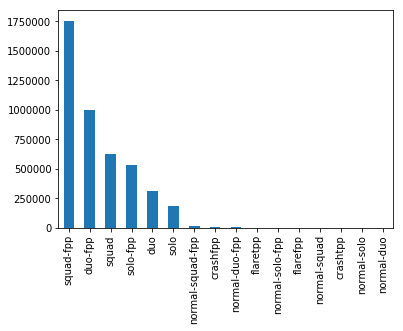

In [0]:
z = train.matchType.value_counts()
z.plot.bar()
plt.show()

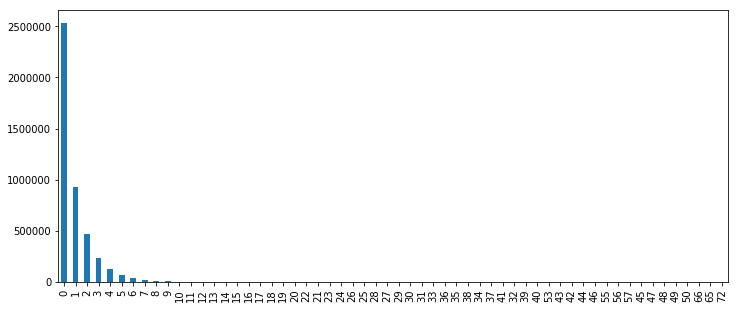

In [0]:
z = train.kills.value_counts()
plt.figure(figsize=(12,5))
z.plot.bar()
plt.show()

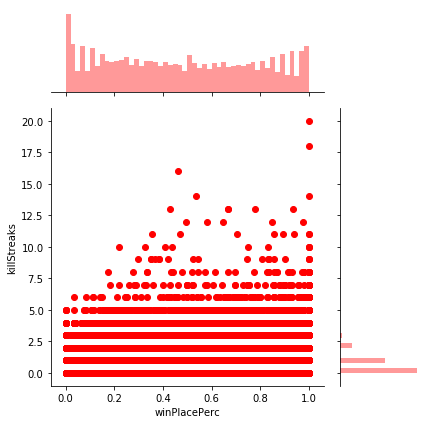

In [0]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=train, ratio=3, color='r')
plt.show()

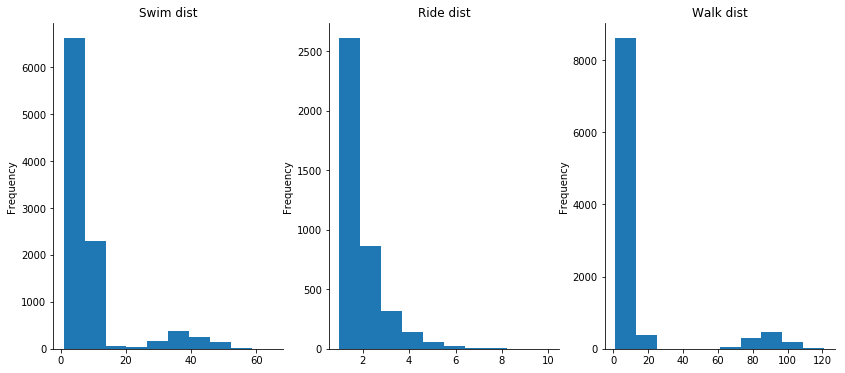

In [0]:
figure1, axarr1 = plt.subplots(1, 3, figsize=(14, 6))
train['swimDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axarr1[0])
train['rideDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axarr1[1])
train['walkDistance'].value_counts().sort_index()[1:20].plot.hist(ax=axarr1[2])
axarr1[0].set_title('Swim dist')
axarr1[1].set_title('Ride dist')
axarr1[2].set_title('Walk dist')
plt.subplots_adjust(hspace=.3)
sns.despine()

Encode Match Type as it is categorical variable

In [0]:
matchtype_le = preprocessing.LabelEncoder()
matchtype_le.fit(train.matchType.unique())
enc = matchtype_le.transform(train.matchType)
train_data = train
train_data.matchType = enc

train_data.matchType.head()

0    15
1    15
2     2
3    15
4    13
Name: matchType, dtype: int64

Remove Id, groupid and matchid<br>
Convert to numpy array<br>
Split data (Create 2% test split as data rows are more 5000000)


In [0]:
data = train_data.iloc[:,3:].values
data = shuffle(data)

X = data[:,:-1]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4358025, 25) (4358025,)
(88940, 25) (88940,)


# Linear Model<br>
Fit to a LinearRegression Model, So we have an idea of the fit

In [0]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Mean Square Value and R2 score for Linear Regression

In [0]:
train_predict = clf.predict(X_train)
train_msq = mean_squared_error(y_train, train_predict)
train_r2 = r2_score(y_train, train_predict)
print("Train:\nMean Squared Error :", train_msq, "\nR2 score :", train_r2)

test_predict = clf.predict(X_test)
test_msq = mean_squared_error(y_test, test_predict)
test_r2 = r2_score(y_test, test_predict)
print("\nTest:\nMean Squared Error :", test_msq, "\nR2 score :", test_r2)

Train:
Mean Squared Error : 0.015894585552960392 
R2 score : 0.8317955086282278

Test:
Mean Squared Error : 0.015921824946516883 
R2 score : 0.8316977099939594


Predict Test using our Linear Model

In [0]:
test_data = test.iloc[:,3:]
z = matchtype_le.transform(test.matchType)
test_data.matchType = z
test_data = test_data.values

test_predict = clf.predict(test_data)
test_predict

array([0.18760459, 0.91091134, 0.43954895, ..., 0.80174797, 0.75613336,
       0.01968557])

# Neural Network <br>
using Tensorflow Keras

Define R2 metric and Callback to check score on Test data

In [0]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
  
class TestCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, coeff = self.model.evaluate(x, y, verbose=0)
        
        print('\nTesting loss: {}, r2 computed: {}\n'.format(loss, coeff))

Define model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape = [25], activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
______________________

In [0]:
model.fit(X_train, y_train, epochs=10, callbacks=[TestCallback((X_test, y_test))])

Epoch 1/10
4357728/4358025 [============================>.] - ETA: 0s - loss: 0.0084 - coeff_determination: 0.9062
Testing loss: 0.007840074491290254, r2 computed: 0.9122079014778137

4358025/4358025 [==============================] - 513s 118us/sample - loss: 0.0084 - coeff_determination: 0.9062
Epoch 2/10
4357760/4358025 [============================>.] - ETA: 0s - loss: 0.0078 - coeff_determination: 0.9130
Testing loss: 0.00769933350373764, r2 computed: 0.9132512807846069

4358025/4358025 [==============================] - 506s 116us/sample - loss: 0.0078 - coeff_determination: 0.9131
Epoch 3/10
4357888/4358025 [============================>.] - ETA: 0s - loss: 0.0076 - coeff_determination: 0.9151
Testing loss: 0.0073351618436766, r2 computed: 0.9173192977905273

4358025/4358025 [==============================] - 512s 118us/sample - loss: 0.0076 - coeff_determination: 0.9151
Epoch 4/10
4358016/4358025 [============================>.] - ETA: 0s - loss: 0.0076 - coeff_determination: 0

Check the model on test data

In [0]:
test_data = test.iloc[:,3:]
z = matchtype_le.transform(test.matchType)
test_data.matchType = z
test_data = test_data.values

testsetpredict = model.predict(test_data)
print(testsetpredict)
print(testsetpredict.shape)

submission1 = pd.DataFrame(test['Id'], columns=['Id'])
submission1['winPlacePerc'] = testsetpredict
print(submission1.head())

submission1.to_csv(r'submission1.csv', index=None)

[[0.22975108]
 [0.9139791 ]
 [0.70671654]
 ...
 [0.82505536]
 [0.8017247 ]
 [0.06034794]]
(1934174, 1)


# New Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape = [25], activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', coeff_determination])
model.summary()

class TestCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc, coeff = self.model.evaluate(x, y, verbose=0)
        y_pred = self.model.predict(x)
        
        print('\nTesting loss: {}, acc: {}, r2 computed: {}, r2 actual: {}\n'.format(loss, acc, coeff, r2_score(y,y_pred)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                832       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total para

In [0]:
model.fit(X_train, y_train, epochs=5, callbacks=[TestCallback((X_test, y_test))])

Epoch 1/10
4358016/4358025 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.0777 - coeff_determination: 0.9024
Testing loss: 0.007389530500056558, acc: 0.07763660699129105, r2 computed: 0.9174628853797913, r2 actual: 0.9218885754331659

4358025/4358025 [==============================] - 2955s 678us/sample - loss: 0.0088 - acc: 0.0777 - coeff_determination: 0.9024
Epoch 2/10
 532480/4358025 [==>...........................] - ETA: 42:08 - loss: 0.0080 - acc: 0.0778 - coeff_determination: 0.9110Buffered data was truncated after reaching the output size limit.

In [0]:
test_data = test.iloc[:,3:]
z = matchtype_le.transform(test.matchType)
test_data.matchType = z
test_data = test_data.values

testsetpredict = model.predict(test_data)
print(testsetpredict)
print(testsetpredict.shape)

submission1 = pd.DataFrame(test['Id'], columns=['Id'])
submission1['winPlacePerc'] = testsetpredict
print(submission1.head())

submission1.to_csv(r'submission2.csv', index=None)